<a href="https://colab.research.google.com/github/poonambje/Food-Recognition-and-Ingredient-Decoder/blob/main/miniprojectvgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


     |████████████████████████████████| 462 kB 23.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [ ]:
train = '/content/drive/MyDrive/food20dataset/train_set.csv'
test= '/content/drive/MyDrive/food20dataset/test_set.csv'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/food20dataset/train_set/*')
  

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

augumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/food20dataset/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/food20dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
15/15 [==============================] - 340s 22s/step - loss: 1.5170 - accuracy: 0.5083 - val_loss: 0.9737 - val_accuracy: 0.7000
Epoch 2/5
15/15 [==============================] - 307s 21s/step - loss: 0.5864 - accuracy: 0.8021 - val_loss: 0.7912 - val_accuracy: 0.7083
Epoch 3/5
15/15 [==============================] - 280s 19s/step - loss: 0.3772 - accuracy: 0.8687 - val_loss: 0.7781 - val_accuracy: 0.7333
Epoch 4/5
15/15 [==============================] - 280s 19s/step - loss: 0.2268 - accuracy: 0.9354 - val_loss: 0.6541 - val_accuracy: 0.8000
Epoch 5/5
15/15 [==============================] - 306s 21s/step - loss: 0.1316 - accuracy: 0.9667 - val_loss: 0.6082 - val_accuracy: 0.8167


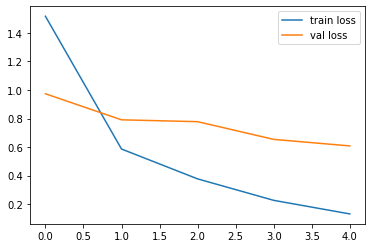

<Figure size 432x288 with 0 Axes>

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


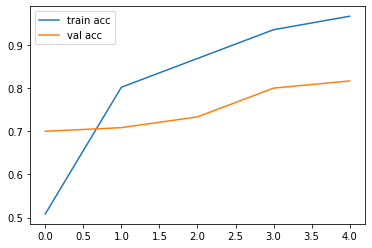

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

predictions


In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/food20dataset/test_set/halwa/halwatest (14).jpg", target_size=IMAGE_SIZE
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)

[0. 0. 0. 0. 1. 0.]


In [ ]:
#saved ingredients of dishes
Biriyani =[ 'rice','mint leaves','salt','refined oil','green cardamom','clove','onion','teaspoon turmeric','tablespoon garlic paste','hung curd','coriander leaves','water','ghee']
Chapati = ['whole wheat flour','salt']
Dosa = ['Rice','Urad Dal','Chana Dal','Methi seeds','Water']
Gulab_Jamun =['Maida (All purpose flours)','Sugar','Water']
Halwa = ['Semolina','Ghee','Almonds','Sugar','Cardamom Powder']
Idly = ['Rice','Moong-Dal']
ingredients=[]
ingredients.append(Biriyani)
ingredients.append(Chapati)
ingredients.append(Dosa)
ingredients.append(Gulab_Jamun)
ingredients.append(Halwa)
ingredients.append(Idly)


In [ ]:
class_names=['Biriyani','Chapati','Dosa','Gulab_Jamun','Halwa','Idly']

output_class=class_names[np.argmax(score)]
print("The predicted class is: ", output_class)

print("The ingredients are:",ingredients[np.argmax(score)] )
#for i in range(len(output_class)):
  #print(output_class[i])


The predicted class is:  Halwa
The ingredients are: ['Semolina', 'Ghee', 'Almonds', 'Sugar', 'Cardamom Powder']
